### Sign-language-digits in Fastai

In [1]:
from fastai.vision import *

In [2]:
path = 'Sign-Language-Digits-Dataset/Dataset/'

In [3]:
#data without data augumentation
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
         size=100, num_workers=4, bs=64).normalize(imagenet_stats)

In [4]:
# some info about dataset
print(data.classes)
print(data.c)
print(len(data.train_ds))
print(len(data.valid_ds))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
10
1650
412


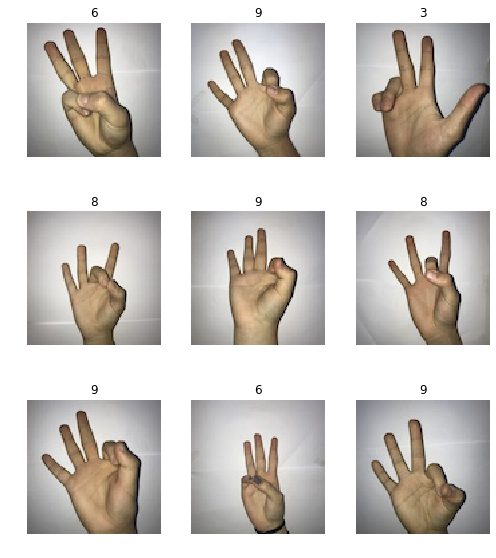

In [5]:
# data sample
data.show_batch(rows=3, figsize=(7,8))

In [6]:
# model: resnet34
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [7]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.988429,0.854380,0.713592,00:02
1,1.186090,0.486404,0.847087,00:03
2,0.782485,0.384062,0.871359,00:02
3,0.542073,0.352956,0.881068,00:02
4,0.405167,0.349022,0.883495,00:02


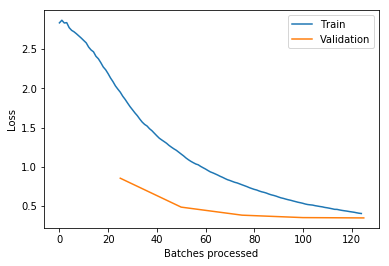

In [8]:
learn.recorder.plot_losses()

In [9]:
# model with data augumentation
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=100, num_workers=4, bs=64).normalize(imagenet_stats)

learn = cnn_learner(data, models.resnet34, metrics=accuracy)

learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,2.101988,1.112493,0.621359,00:03
1,1.422736,0.811040,0.694175,00:03
2,1.065645,0.706296,0.745146,00:03
3,0.876860,0.624748,0.771845,00:03
4,0.740942,0.627520,0.776699,00:03


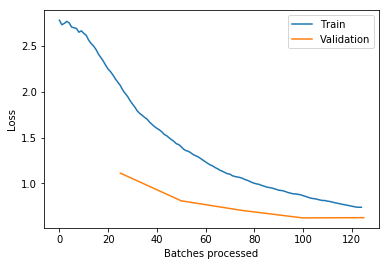

In [10]:
learn.recorder.plot_losses()

In [11]:
# unfreeze pre-trained layers
learn.unfreeze()
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.446078,0.394718,0.878641,00:04
1,0.303271,0.229046,0.919903,00:03
2,0.220967,0.219076,0.944175,00:03
3,0.159299,0.112042,0.963592,00:03
4,0.107357,0.050669,0.978155,00:03


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


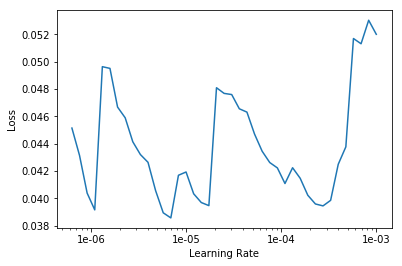

In [12]:
# search the best learning rate
learn.lr_find()
learn.recorder.plot()

In [13]:
# training
learn.fit_one_cycle(5, max_lr=slice(1e-06, 1e-05))

epoch,train_loss,valid_loss,accuracy,time
0,0.039410,0.053547,0.978155,00:03
1,0.039347,0.060890,0.980583,00:03
2,0.037604,0.049978,0.980583,00:03
3,0.041836,0.054473,0.978155,00:03
4,0.036279,0.046756,0.980583,00:03


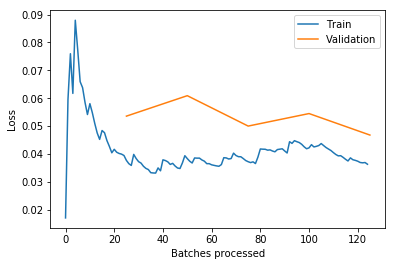

In [14]:
learn.recorder.plot_losses()

In [15]:
# where model make mistake?
from fastai.vision import *

interp = ClassificationInterpretation.from_learner(learn)

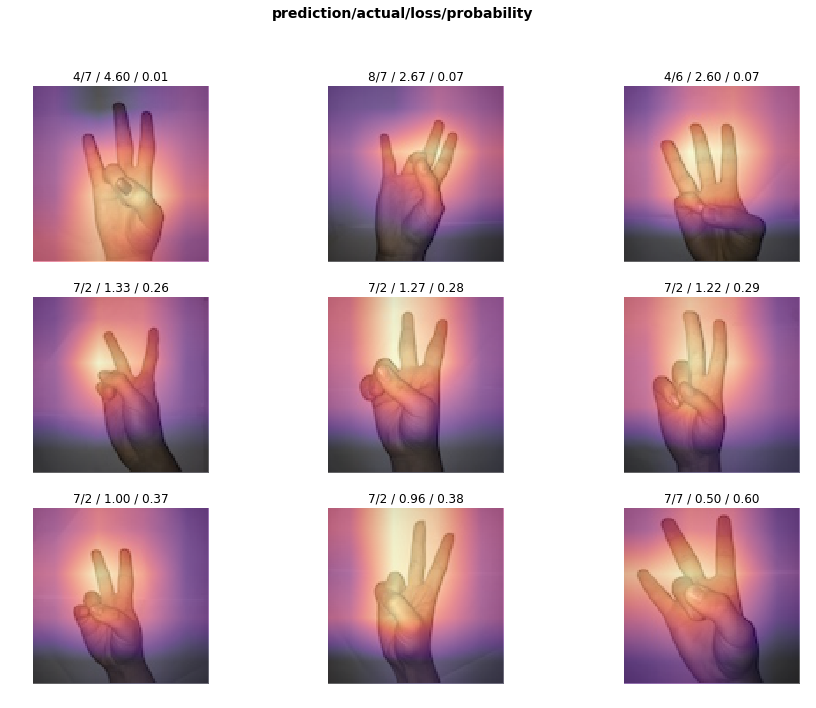

In [16]:
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)
interp.plot_top_losses(9, figsize=(15,11))

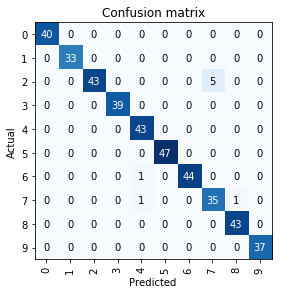

In [17]:
interp.plot_confusion_matrix()

In [18]:
# another model: resnet50 without data augumentation
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
       size=100, num_workers=4, bs=64).normalize(imagenet_stats)

learn = cnn_learner(data, models.resnet50, metrics=accuracy)

learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.605238,0.701939,0.769417,00:04
1,0.959865,0.554804,0.798544,00:03
2,0.618452,0.506474,0.813107,00:03
3,0.413584,0.480491,0.827670,00:03
4,0.282192,0.477467,0.844660,00:03


In [ ]:
learn.recorder.plot_losses()

In [19]:
# resnet50 with data augumentation
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=100, num_workers=4, bs=64).normalize(imagenet_stats)

learn = cnn_learner(data, models.resnet50, metrics=accuracy).to_fp16()

learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.754762,0.903818,0.706311,00:04
1,1.190495,0.666999,0.786408,00:03
2,0.947343,0.478544,0.839806,00:04
3,0.781543,0.439410,0.849515,00:03
4,0.667441,0.431401,0.847087,00:04


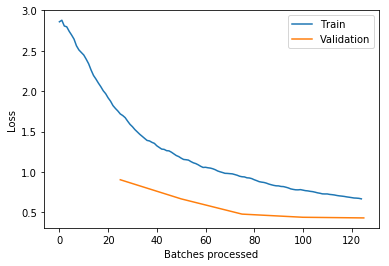

In [20]:
learn.recorder.plot_losses()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


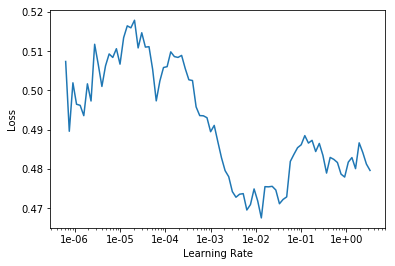

In [21]:
learn.lr_find()
learn.recorder.plot()

In [22]:
# resnet50 with learning rate
learn.fit_one_cycle(5, max_lr=1e-03)

epoch,train_loss,valid_loss,accuracy,time
0,0.494322,0.435413,0.847087,00:03
1,0.480247,0.439876,0.837379,00:03
2,0.490111,0.434581,0.847087,00:03
3,0.485909,0.425629,0.851942,00:03
4,0.483851,0.431345,0.849515,00:03


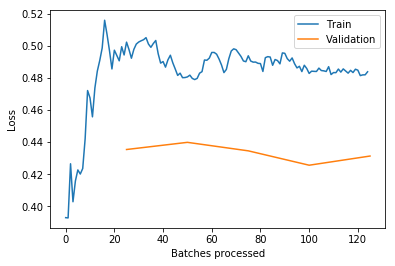

In [23]:
learn.recorder.plot_losses()

### Results

resnet34 without data augumentation:
resnet34 with data augumentation:

resnet50 without data augumentation:
resnet50 with data augumentation:

resnet34 with default learnirng rate: 
resnet34 with set learning rate:

resnet50 with default learnirng rate: 
resnet50 with set learning rate:

resnet34 unfreeze:
resnet50 unfreeze:

resnet34 n epoch:
resnet50 n epoch: 